In [2]:
!pip install seaborn


[notice] A new release of pip available: 22.3.1 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns #importo la libreria 

In [23]:
empleos = pd.read_excel("mujeres.xlsx") #cargo los datos

In [24]:
empleos #muestro los datos

,autor,etiqueta,descripcion,ocupacion,genero,nacAño,nacLugar,nacLat,nacLon,nacPais,...,wikidataURL,viaf,viafURL,bne,bneURL,mncars,mncarsCatWeb,wikipedias,wk_ES,wkPREF
0,"Aagesen, Dorthe::",Dorthe Aagesen (1966-),Dorthe Aagesen; b. 1966; MA en historia del ar...,comisaria de exposiciones|conservadora de muse...,femenino,1966.0,NaN,NaN,NaN,NaN,...,https://m.wikidata.org/wiki/Q64152986,5098108,https://viaf.org/viaf/5098108,XX1689375,http://catalogo.bne.es/uhtbin/authoritybrowse....,NaN,NaN,NaN,NaN,NaN
1,"Aalto, Aino:1894:1949",Aino Aalto (1894-1949),Arquitecta y diseñadora finlandesa,arquitecta|diseñadora,femenino,1894.0,Helsinki,24.934170,60.175560,Finlandia,...,https://m.wikidata.org/wiki/Q273511,42096370,https://viaf.org/viaf/42096370,XX5524007,http://catalogo.bne.es/uhtbin/authoritybrowse....,NaN,NaN,https://es.wikipedia.org/wiki/Aino_Aalto|https...,https://es.wikipedia.org/wiki/Aino_Aalto,https://es.m.wikipedia.org/wiki/Aino_Aalto
2,"Aalto, Elissa::",Elissa Aalto (1922-1994),Arquitecta finlandesa,arquitecta,femenino,1922.0,Kemi,24.563416,65.733635,Finlandia,...,https://m.wikidata.org/wiki/Q2628666,95696562,https://viaf.org/viaf/95696562,XX819288,http://catalogo.bne.es/uhtbin/authoritybrowse....,NaN,NaN,https://es.wikipedia.org/wiki/Elissa_Aalto|htt...,https://es.wikipedia.org/wiki/Elissa_Aalto,https://es.m.wikipedia.org/wiki/Elissa_Aalto
3,"Aas, Marte:1966:",Marte Aas (1966-),Fotógrafa noruega,artista de instalaciones|fotógrafa|videoartista,femenino,1966.0,NaN,NaN,NaN,NaN,...,https://m.wikidata.org/wiki/Q38105800,127432460,https://viaf.org/viaf/127432460,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,"Aav, Marianne::",Marianne Aav (1952-2011),Historiadora del arte y curadora del Museo de ...,historiadora del arte,femenino,1952.0,NaN,NaN,NaN,NaN,...,https://m.wikidata.org/wiki/Q11880904,37071027,https://viaf.org/viaf/37071027,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10096,"West, Pennerton:1913:",Pennerton West (1913-1965),Artista estadounidense,grabadora,femenino,1913.0,Nueva York,-74.000000,40.700000,Estados Unidos,...,https://m.wikidata.org/wiki/Q50975883,NaN,NaN,NaN,NaN,NaN,NaN,https://en.wikipedia.org/wiki/Pennerton_West|h...,NaN,https://en.m.wikipedia.org/wiki/Pennerton_West
10097,"Woutermaertens, Barbara:1966:",Barbara Woutermaertens (1966-),NaN,fotógrafa,femenino,1966.0,NaN,NaN,NaN,NaN,...,https://m.wikidata.org/wiki/Q97497533,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10098,"Yanase, Hisae:1943:",Hisae Yanase (1943-2019),"Ceramista, pintora y escultora japonesa, afinc...",ceramista|escultora|pintora,femenino,1943.0,Prefectura de Chiba,140.123194,35.604583,Japón,...,https://m.wikidata.org/wiki/Q28134580,NaN,NaN,XX1592774,http://catalogo.bne.es/uhtbin/authoritybrowse....,NaN,NaN,https://es.wikipedia.org/wiki/Hisae_Yanase|htt...,https://es.wikipedia.org/wiki/Hisae_Yanase,https://es.m.wikipedia.org/wiki/Hisae_Yanase
10099,"Z., Pamela:1956:",Pamela Z (1956-),"Compositora, intérprete y artista multimedia e...",cantante|compositora,femenino,1956.0,Búfalo,-78.878056,42.886389,Estados Unidos,...,https://m.wikidata.org/wiki/Q7129286,51985237,https://viaf.org/viaf/51985237,NaN,NaN,NaN,NaN,https://en.wikipedia.org/wiki/Pamela_Z,NaN,https://en.m.wikipedia.org/wiki/Pamela_Z


In [55]:
empleos.ocupacion.value_counts()

pintora                                                                                               773
historiadora del arte                                                                                 502
fotógrafa                                                                                             402
artista                                                                                               393
artista visual                                                                                        190
                                                                                                     ... 
artista|escultora|fotógrafa|profesora universitaria                                                     1
biógrafa|coleccionista de arte|compositora|escritora|modelo|música|pintora                              1
escritora|filósofa|poeta|profesora universitaria|traductora                                             1
artista conceptual|artista de instalaciones|ar

In [25]:
# Separo las múltiples ocupaciones en diferentes filas
empleos = empleos.assign(ocupación=df['ocupacion'].str.split('|')).explode('ocupacion')

In [26]:
# Creo una columna que indica si la ocupación es 'pintora'
empleos['es_pintora'] = empleos['ocupacion'].str.contains('pintora', case=False, na=False)

In [27]:
# Contar el número total de pintoras
num_pintoras = empleos['es_pintora'].sum()
print(f'Número total de pintoras: {num_pintoras}')

Número total de pintoras: 2150


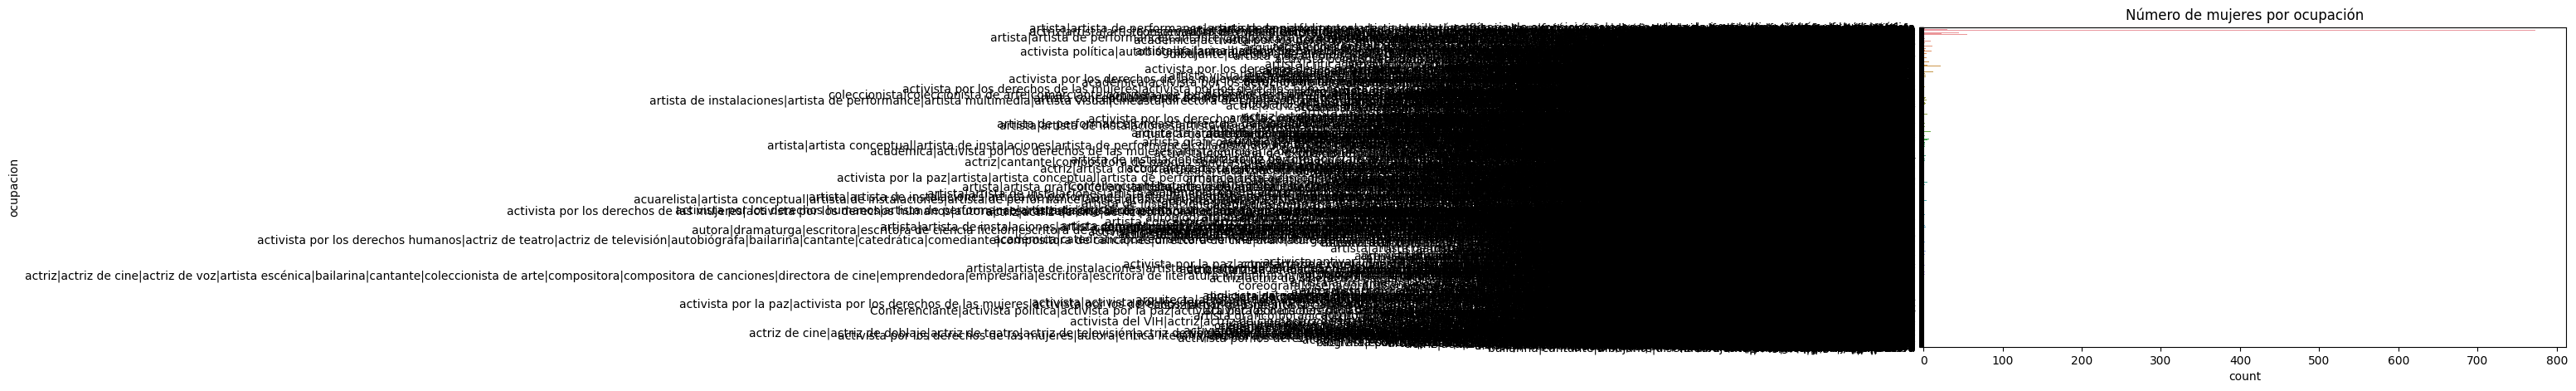

In [17]:
# Gráfico de barras de todas las ocupaciones
plt.figure(figsize=(10, 5))
sns.countplot(data=df, y='ocupacion')
plt.title('Número de mujeres por ocupación')
plt.show()

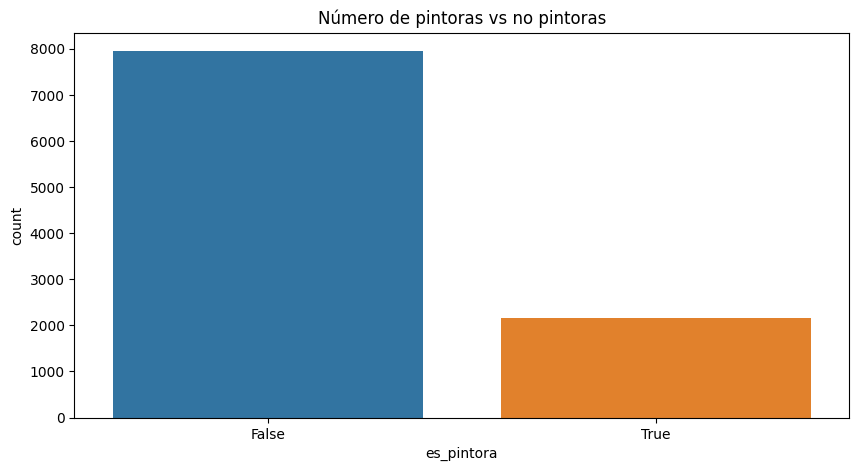

In [13]:
# Gráfico de barras para 'pintora' vs. 'no pintora'
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='es_pintora')
plt.title('Número de pintoras vs no pintoras')
plt.show()


In [28]:
# grafico de los paises con más mujeres pintoras 
# Agrupo por país y contamos el número de mujeres en cada país
mujeres_por_pais = df['nacLugar'].value_counts()

In [29]:
mujeres_por_pais 

Nueva York             197
Barcelona              186
Madrid                 172
París                  128
Londres                115
                      ... 
Cremona                  1
Cheshire                 1
Goleniów                 1
El Escorial              1
Prefectura de Chiba      1
Name: nacLugar, Length: 2607, dtype: int64

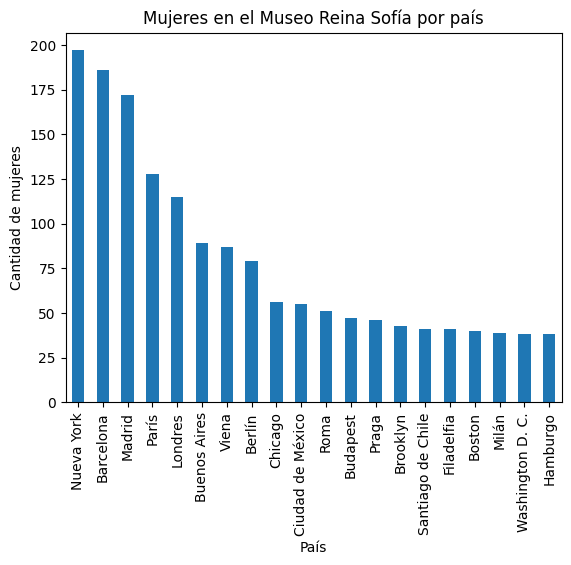

In [56]:
# Grafica resultados
mujeres_por_pais.head(20).plot(kind='bar')
plt.xlabel('País')
plt.ylabel('Cantidad de mujeres')
plt.title('Mujeres en el Museo Reina Sofía por país')
plt.show()

In [32]:
visitantes = pd.read_excel("corregida-visitantes-sexo.xls") #cargo la  libreria

In [33]:
visitantes

,Unidades: En % del total de cada colectivo,Column,Column2,Column3,Column4,Column5,Column6,Column7,Column8,Column9,Column10
0,NaN,TOTAL,MUSEOS,EXPOSICIONES,GALERÍAS DE ARTE,MONUMENTOS-YACIMIENTOS,MONUMENTOS,YACIMIENTOS-ARQUEOLÓGICOS,ARCHIVOS,NaN,NaN
1,NaN,2021-2022,2021-2022,2021-2022,2021-2022,2021-2022,2021-2022,2021-2022,2021-2022,NaN,NaN
2,TOTAL,25.5,20.1,14.5,6.9,28.2,26.4,11.6,3.5,NaN,NaN
3,HOMBRES,26.5,20.8,15.2,7.7,30,28,13.7,3.7,NaN,NaN
4,MUJERES,24.6,19.5,13.9,6.1,26.6,24.9,9.6,3.3,NaN,NaN
5,DE 15 A 19 AÑOS,30.5,22.7,16.8,8.4,31.5,29.7,10.7,5,NaN,NaN
6,DE 20 A 24 AÑOS,36.2,29,21,10.2,36.1,35.1,13.2,5.6,NaN,NaN
7,DE 25 A 34 AÑOS,30.9,24.3,18.2,8.8,36,33.5,14.7,4.3,NaN,NaN
8,DE 35 A 44 AÑOS,30.4,24.6,16.7,7.5,34.4,32.1,14.4,3.6,NaN,NaN
9,DE 45 A 54 AÑOS,27.5,21.6,16,7.8,32.4,30.2,14.8,4.1,NaN,NaN


In [34]:
hombres = visitantes.loc[3, 'Column2']
mujeres = visitantes.loc[4, 'Column2']

In [35]:
datos = [hombres, mujeres]
etiquetas = ['Hombres', 'Mujeres']

Text(0.5, 1.0, 'Cantidad de Hombres y Mujeres que visitan museos')

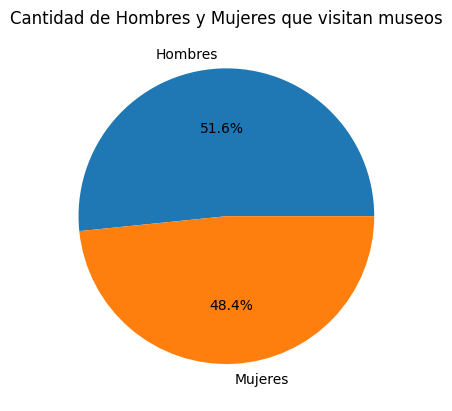

In [36]:
plt.pie(datos, labels=etiquetas, autopct='%1.1f%%')
plt.title('Cantidad de Hombres y Mujeres que visitan museos')


In [46]:
personas_1519 = visitantes.loc[5, 'Column2']
personas_2024 = visitantes.loc[6, 'Column2']
personas_2534 = visitantes.loc[7, 'Column2']
personas_3544 = visitantes.loc[8, 'Column2']
personas_4554 = visitantes.loc[9, 'Column2']
personas_5564 = visitantes.loc[10, 'Column2']
personas_6574 = visitantes.loc[11, 'Column2']
personas_75 = visitantes.loc[12, 'Column2']

In [47]:
datos = [personas_1519,personas_2024,personas_2534,personas_3544,personas_4554,personas_5564,personas_6574,personas_75]
etiquetas = ['15-19 años', ' 20-24 años', '25-34', '35-44', '45-54', '55-64', '65-74', 'Más de 75']

In [ ]:
plt.pie(datos, labels=etiquetas, autopct='%1.1f%%')
plt.title('Visitas a los museos por rangos de edad')

In [53]:
datos = [personas_1519,personas_2024,personas_2534,personas_3544,personas_4554,personas_5564,personas_6574,personas_75]
etiquetas = ['15-19 años', ' 20-24 años', '25-34', '35-44', '45-54', '55-64', '65-74', 'Más de 75']

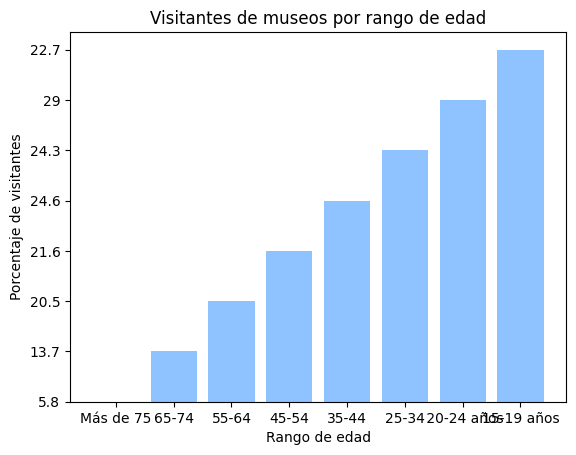

In [54]:
# Invertir los datos y etiquetas
datos = datos[::-1]
etiquetas = etiquetas[::-1]
# Creo el gráfico de 
plt.bar(etiquetas, datos, color='#8EC3FF')

# Personalizo el gráfico
plt.title('Visitantes de museos por rango de edad')
plt.xlabel('Rango de edad')
plt.ylabel('Porcentaje de visitantes')
plt.show()


In [41]:
profesiones = pd.read_excel("visitaok.xls")

In [42]:
profesiones

,Encuesta de Hábitos y Prácticas Culturales 2021-2022,Column,Column2,Column3,Column4,Column5,Column6,Column7,Column8,Column9,Column10,Column 12,Column 13,Column 14,Column 15,Column 16,Column 17,Column 18,Column 19
0,,Museos,NaN,NaN,Exposiciones,NaN,NaN,Galerías de arte,NaN,NaN,Monumentos,NaN,NaN,Yacimientos arqueológicos,NaN,NaN,Archivos,NaN,NaN
1,,Total han visitado en un año,profesión,ocio,Total han visitado en un año,Por profesión o estudios,Por ocio o entretenimiento,Total han visitado en un año,Por profesión o estudios,Por ocio o entretenimiento,Total han visitado en un año,Por profesión o estudios,Por ocio o entretenimiento,Total han visitado en un año,Por profesión o estudios,Por ocio o entretenimiento,Total han visitado en un año,Por profesión o estudios,Por ocio o entretenimiento
2,,2021-2022,2021-2022,2021-2022,2021-2022,2021-2022,2021-2022,2021-2022,2021-2022,2021-2022,2021-2022,2021-2022,2021-2022,2021-2022,2021-2022,2021-2022,2021-2022,2021-2022,2021-2022
3,TOTAL,100,6.3,93.7,100,8.6,91.4,100,6.9,93.1,100,4,96,100,5.1,94.9,100,36.7,63.3
4,Hombres,100,6.3,93.7,100,8.5,91.5,100,6.9,93.1,100,4.8,95.2,100,5.5,94.5,100,33.6,66.4
5,Mujeres,100,6.3,93.7,100,8.7,91.3,100,7,93,100,3.2,96.8,100,4.6,95.4,100,40,60
6,De 15 a 24 años,100,14.3,85.7,100,24.5,75.5,100,20.1,79.9,100,10.4,89.6,100,16,84,100,53.5,46.5
7,De 25 a 34 años,100,5.5,94.5,100,5.5,94.5,100,2.3,97.7,100,2.4,97.6,100,4.6,95.4,100,24.1,75.9
8,De 35 a 44 años,100,6.2,93.8,100,6.6,93.4,100,6,94,100,3.7,96.3,100,5.3,94.7,100,31.5,68.5
9,De 45 a 54 años,100,4.4,95.6,100,5.8,94.2,100,4.8,95.2,100,3,97,100,2.8,97.2,100,37.8,62.2


In [43]:
ocio = profesiones.loc[3, 'Column2']
profesion = profesiones.loc[3, 'Column3']

In [50]:
datos = [ocio, profesion]
etiquetas = ['Ocio', 'Profesión']

Text(0.5, 1.0, 'Visitas a los museos por motivación')

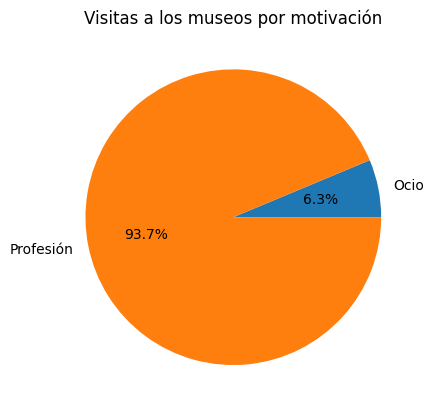

In [51]:
plt.pie(datos, labels=etiquetas, autopct='%1.1f%%')
plt.title('Visitas a los museos por motivación')